In [32]:
import numpy as np
import pandas as pd
import os.path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data augmentation
import matplotlib.pyplot as plt #for plotting
from matplotlib.image import imread
import cv2

In [2]:
# Define paths to your dataset
train_dir = 'D:/ECG_Image_data/train'
test_dir = 'D:/ECG_Image_data/test'

### The dataset has been used in exploring heartbeat classification with The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction.

### Classes

N: Normal beat  
S: Supraventricular premature beat  
V: Premature ventricular contraction  
F: Fusion of ventricular and normal beat  
Q: Unclassifiable beat  
M: myocardial infarction  

In [3]:
# Set parameters
img_size = (224, 224)
batch_size = 32

## Train Dataset

In [4]:
datagen = ImageDataGenerator(rescale=1./255) #normalizatin

In [5]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical' #6 classes 
)

Found 99199 images belonging to 6 classes.


In [12]:
# Get the class indices
class_indices=train_generator.class_indices
class_indices

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}

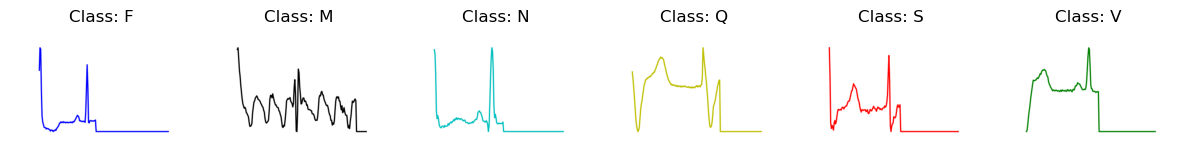

In [34]:
# Get a list of class directories
class_directories = os.listdir(train_dir)

# Plot one image from each class
plt.figure(figsize=(12, 8))
for i, class_dir in enumerate(class_directories):
    # Get the list of image files in each class directory
    class_path = os.path.join(train_dir, class_dir)
    image_files = os.listdir(class_path)

    # Select the first image from each class for visualization
    image_path = os.path.join(class_path, image_files[0])
    image = imread(image_path)

    # Plot the image
    plt.subplot(1, len(class_directories), i + 1)
    plt.imshow(image)
    plt.title(f'Class: {class_dir}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Count the number of images in each class
class_counts = {class_name: 0 for class_name in class_indices}

for class_index in train_generator.classes:
    class_name = list(class_indices.keys())[list(class_indices.values()).index(class_index)]
    class_counts[class_name] += 1

# Display the number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'F' has 642 images.
Class 'M' has 8405 images.
Class 'N' has 75709 images.
Class 'Q' has 6431 images.
Class 'S' has 2223 images.
Class 'V' has 5789 images.


## Test Dataset

In [14]:
datagen = ImageDataGenerator(rescale=1./255) #normalizatin
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 24799 images belonging to 6 classes.


In [15]:
# Get the class indices
test_generator.class_indices

{'F': 0, 'M': 1, 'N': 2, 'Q': 3, 'S': 4, 'V': 5}

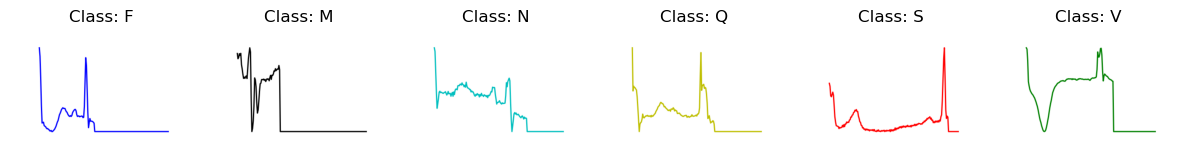

In [35]:
# Get a list of class directories
class_directories = os.listdir(test_dir)

# Plot one image from each class
plt.figure(figsize=(12, 8))
for i, class_dir in enumerate(class_directories):
    # Get the list of image files in each class directory
    class_path = os.path.join(test_dir, class_dir)
    image_files = os.listdir(class_path)

    # Select the first image from each class for visualization
    image_path = os.path.join(class_path, image_files[0])
    image = imread(image_path)

    # Plot the image
    plt.subplot(1, len(class_directories), i + 1)
    plt.imshow(image)
    plt.title(f'Class: {class_dir}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Count the number of images in each class
class_counts = {class_name: 0 for class_name in class_indices}

for class_index in test_generator.classes:
    class_name = list(class_indices.keys())[list(class_indices.values()).index(class_index)]
    class_counts[class_name] += 1

# Display the number of images in each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} images.")

Class 'F' has 161 images.
Class 'M' has 2101 images.
Class 'N' has 18926 images.
Class 'Q' has 1608 images.
Class 'S' has 556 images.
Class 'V' has 1447 images.


# CNN

In [27]:
from tensorflow.keras import layers, models #for neural network
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    Dense(128, activation='relu'),#responsible for learning non-linear patterns in the data
    Dense(64, activation='relu'),
    Dense(6, activation='softmax') #multi-class  classification 
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               50466944  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 6)                 390       
                                                      

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#The optimizer is responsible for updating the model's weights
#The loss function measures the difference between the predicted values and the true values during training
#Metrics are used to evaluate the model performance during training

In [29]:
# Train the model
result = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
)

Epoch 1/5
3099/3099 [==============================] - 14636s 5s/step - loss: 0.0905 - accuracy: 0.9956
Epoch 2/5
3099/3099 [==============================] - 4864s 2s/step - loss: 2.4830e-06 - accuracy: 1.0000
Epoch 3/5
3099/3099 [==============================] - 3151s 1s/step - loss: 1.4857e-07 - accuracy: 1.0000
Epoch 4/5
3099/3099 [==============================] - 3144s 1s/step - loss: 3.5553e-08 - accuracy: 1.0000
Epoch 5/5
3099/3099 [==============================] - 3171s 1s/step - loss: 9.0651e-09 - accuracy: 1.0000


In [36]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

775/775 [==============================] - 225s 291ms/step - loss: 7.7313e-08 - accuracy: 1.0000
Test Accuracy: 1.0


Text(0, 0.5, 'loss')

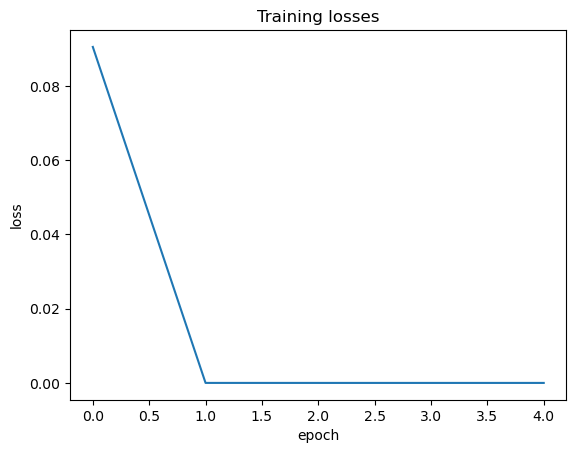

In [47]:
plt.plot(result.history['loss'])
plt.title('Training losses')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

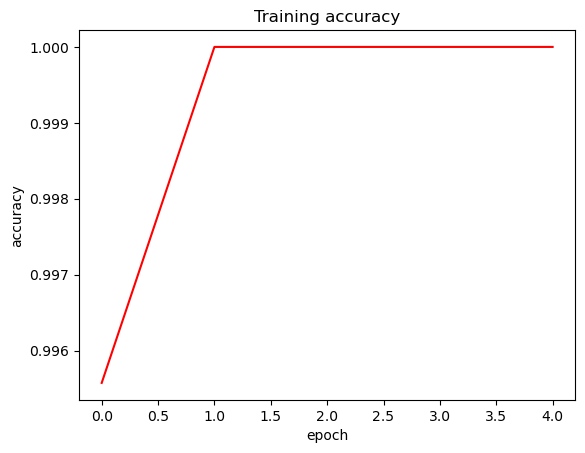

In [52]:
plt.plot(result.history['accuracy'],color='red')
plt.title('Training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

## Residual Network 50(ResNet 50)

In [55]:
from tensorflow.keras.applications import ResNet50
pretrained_model = ResNet50(
                              input_shape=(224,224,3),
                              include_top= False,
                              weights='imagenet',
                              pooling='avg'
                              )

pretrained_model.trainable = False

94765736/94765736 [==============================] - 98s 1us/step


In [56]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

model = Sequential ([
                        pretrained_model,
                        Flatten(),
                        Dropout(0.2),
                        Dense(128, activation='relu'),
                        Dense(64, activation='relu'),
                        Dense(6, activation='softmax')
                    ])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               262272    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 6)                 390       
                                                                 
Total params: 23,858,630
Trainable params: 270,918
Non

In [57]:
import keras
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    save_weights_only=False,
    mode='max',
    save_best_only=True,
    verbose=1)

In [58]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [60]:
result=model.fit(
    train_generator,
    steps_per_epoch=3072//32,
    epochs=10,
    callbacks=[checkpoint]
)


Epoch 1/10
96/96 [==============================] - 174s 2s/step - loss: 0.6600 - accuracy: 0.8158
Epoch 2/10
96/96 [==============================] - 162s 2s/step - loss: 0.3376 - accuracy: 0.8929
Epoch 3/10
96/96 [==============================] - 165s 2s/step - loss: 0.2482 - accuracy: 0.9189
Epoch 4/10
96/96 [==============================] - 162s 2s/step - loss: 0.1972 - accuracy: 0.9294
Epoch 5/10
96/96 [==============================] - 162s 2s/step - loss: 0.1733 - accuracy: 0.9404
Epoch 6/10
96/96 [==============================] - 161s 2s/step - loss: 0.1661 - accuracy: 0.9443
Epoch 7/10
96/96 [==============================] - 161s 2s/step - loss: 0.1340 - accuracy: 0.9535
Epoch 8/10
96/96 [==============================] - 161s 2s/step - loss: 0.1619 - accuracy: 0.9460
Epoch 9/10
96/96 [==============================] - 163s 2s/step - loss: 0.1130 - accuracy: 0.9603
Epoch 10/10
96/96 [==============================] - 164s 2s/step - loss: 0.1194 - accuracy: 0.9564


Text(0, 0.5, 'loss')

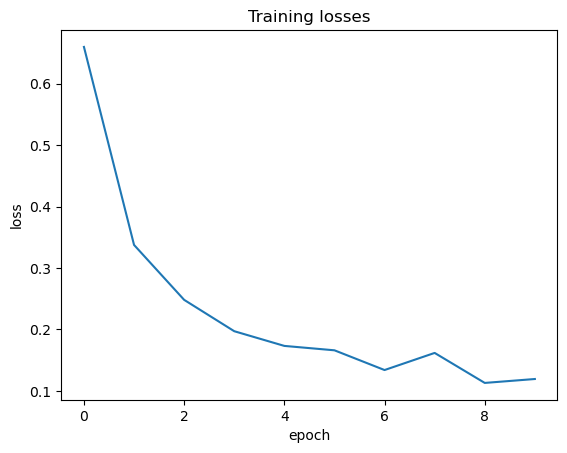

In [61]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.title('Training losses')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

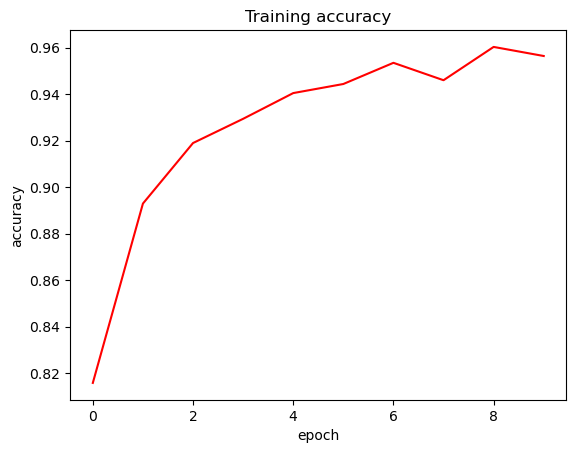

In [62]:
plt.plot(result.history['accuracy'],color='red')
plt.title('Training accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')